In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import variables as v
import re
import functions as f
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import squarify


friends_1 = pd.read_csv(v.guiones_csv, sep=',')
friends_1.set_index('Unnamed: 0')

friends_imdb2 = pd.read_csv(v.imdb2_csv, sep=',', encoding='latin-1')

friends_visualiz = pd.read_csv(v.visualizados_csv, sep=',', encoding='latin-1')



In [2]:
friends_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61256 entries, 0 to 61255
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      61256 non-null  int64 
 1   season_number   61256 non-null  int64 
 2   episode_number  61256 non-null  int64 
 3   episode_name    61256 non-null  object
 4   character       61256 non-null  object
 5   line            61256 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.8+ MB


In [3]:
# COMPROBAMOS CUANTOS Y QUÉ PERSONAJES HAY A LO LARGO DE LA SERIE

print(friends_1['character'].nunique())
friends_1['character'].unique()


940


array(['monica', 'joey', 'chandler', 'phoebe', 'all', 'ross', 'rachel',
       'waitress', 'phoebe, ross, chandler, and\xa0joey', 'paul',
       'priest on tv', 'frannie', 'ross and rachel', 'customer', 'marsha',
       'carol', 'chandler and\xa0joey', 'mrs. geller', 'mr. geller',
       'susan', 'barry', 'robbie', 'bernice', 'dr. oberman', 'paula',
       'alan', 'the guys', 'lizzie', 'guys', 'leslie', 'kiki', 'joanne',
       'receptionist', 'pizza guy', 'monica and phoebe', 'both', 'kid',
       'angela', 'janice', 'woman', 'bob', 'aurora', 'director', 'jill',
       'monica, joey, and\xa0phoebe', 'mr. heckles', 'paolo', 'shelley',
       'aunt lillian', 'nurse', 'andrea', 'lowell', 'terry', 'guy',
       'girl', 'max', 'david', 'sandy', 'fun bobby', 'dick clark',
       'jay leno', 'mrs. bing', 'coma guy', 'joey, chandler, and ross',
       'carol and susan', "phoebe's assistant", 'joey and\xa0chandler',
       'joey and chandler', 'rachel and\xa0phoebe', 'girls', 'roger',
       '

In [4]:
# AL COMPROBAR LOS PERSONAJES QUE APARECEN EN LA COLUMNA 'character' DESCUBRIMOS QUE EXISTEN CARACTERES QUE NO SON CORRECTOS.
# TAMBIÉN OCURRE EN LA COLUMNA 'line'. PROCEDEMOS A ELIMINARLOS DE AMBAS COLUMNAS
# IGUALMENTE, DESCUBRIMOS QUE EL PERSONAJE RACHEL, EN ALGUNAS FILAS SE LE HA DENOMINADO 'rach' POR LO QUE PROCEDEMOS 
# TAMBIÉN A IGUALARLO AL NOMBRE 'rachel'

friends_1['character'] = friends_1['character'].apply(lambda x: x.replace('\xa0',' '))
friends_1['line'] = friends_1['line'].apply(lambda x: x.replace('\xa0',' '))
friends_1[friends_1['character']=='rach'] = friends_1[friends_1['character']=='rach'].apply(lambda x: x.replace('rach','rachel'))
friends_1[friends_1['character']=='mnca'] = friends_1[friends_1['character']=='mnca'].apply(lambda x: x.replace('mnca','monica'))
friends_1[friends_1['character']=='chan'] = friends_1[friends_1['character']=='chan'].apply(lambda x: x.replace('chan','chandler'))
friends_1[friends_1['character']=='phoe'] = friends_1[friends_1['character']=='phoe'].apply(lambda x: x.replace('phoe','phoebe'))
# friends_1['character'].unique()
friends_1['character'].nunique()


911

In [5]:
# CONTINUANDO CON LA REVISIÓN PREVIA DE PERSONAJES, DESCUBRIMOS IGUALMENTE QUE EXISTEN PERSONAJES QUE APARECEN ESCRITOS
# EN DISTINTOS FORMATOS (CON ANOTACIONES ENTRE PARÉNTESIS O JUNTO A OTRO PERSONAJE)

lista_noformato = []
lista_doblepersonajes = []
for i in friends_1['character']:
    if ' and ' in i:
        lista_doblepersonajes.append(i)
    elif 'to ' in i:
        lista_noformato.append(i)
    elif '(' in i:
        lista_noformato.append(i)
    elif ' ' in i:
        lista_noformato.append(i)
    else:
        continue

# print(lista_noformato)
print('Hay', len(lista_noformato), 'raros')
print('Hay', len(lista_doblepersonajes), 'dobles con and')

Hay 2589 raros
Hay 257 dobles con and


In [6]:
# PARA RESOLVER EL PROBLEMA ANTERIOR, NOS QUEDAREMOS CON EL PRIMER NOMBRE QUE APARECE EN TODOS ESOS STRINGS.

friends_1['character'] = friends_1['character'].str.extract(r'(^\w+)')

lista_noformato = []
lista_doblepersonajes = []

try:
    for i in friends_1['character']:
        if ' and ' in i:
            lista_doblepersonajes.append(i)
        elif 'to ' in i:
            lista_noformato.append(i)
        elif '(' in i:
            lista_noformato.append(i)
        elif ' ' in i:
            lista_noformato.append(i)
except:
        print('Ya no hay raros')
        
print(friends_1['character'].nunique())
print('Hay', len(lista_noformato), 'raros')
print('Hay', len(lista_doblepersonajes), 'dobles con and')

Ya no hay raros
465
Hay 0 raros
Hay 0 dobles con and


In [7]:
# OBTENEMOS EL NÚMERO TOTAL DE PERSONAJES ÚNICOS...
total_de_personajes = friends_1['character'].nunique()
total_de_personajes

465

In [8]:
# PARA EL SIGUIENTE ESTUDIO QUE QUEREMOS HACER, (TODOS LOS PERSONAJES Y SU APARICIÓN) SACAMOS UN DATAFRAME SOLO DE PERSONAJES Y ELIMINAMOS AQUELLOS QUE DESVIRTUARÍAN EL RESULTADO.

personajes = friends_1.groupby(['character']).count()['line'].sort_values()
df_personajes = pd.DataFrame(personajes)
mask = df_personajes[df_personajes.index=='mr'].index
mask2 = df_personajes[df_personajes.index=='mrs'].index
mask3 = df_personajes[df_personajes.index=='the'].index
mask4 = df_personajes[df_personajes.index=='all'].index
mask5 = df_personajes[df_personajes.index=='dr'].index
mask6 = df_personajes[df_personajes.index=='woman'].index
df_personajes_new = df_personajes.drop(mask|mask2|mask3|mask4|mask5|mask6)

df_personajes_new.loc[df_personajes_new['line'] < 70, 'line'] = 'Other characters'
df_personajes_new.tail(20)


c:\Users\pieci\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead



,line
character,
susan,106
mona,114
david,120
amy,125
gunther,130
paul,133
tag,146
emily,167
charlie,190


In [9]:
# CREAMOS UNA GRÁFICA TIPO PIE CON EL TOTAL DE PERSONAJES QUE A LO LARGO DE LA SERIE TIENE MAS DE 70 INTERVENCIONES 

import plotly.express as px

colors = v.lista_de_colores

fig = px.pie(df_personajes_new, values='line', names=df_personajes_new.index,
             title='(Casi) todos los personajes que aparecen en la serie', color_discrete_sequence=colors, hole=0.4)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.write_html("(Casi) todos los personajes que aparecen en la serie.html")

iplot(fig)

In [10]:
# SEGUIMOS CON LA LIMPIEZA DE DATOS DEL DATAFRAME PRINCIPAL

# TENEMOS QUE ELIMINAR DE LA COLUMNA DE 'line' LAS ACOTACIONES QUE VAN ENTRE PARÉNTESIS
# YA QUE NO FORMAN PARTE DE LAS FRASES Y LO USAREMOS COMO RECUENTO DE PALABRAS.

# COMO DATO CURIOSO: SIN REALIZAR ESTE TRABAJO DE LIMPIEZA DE LAS ACOTACIONES, EL ORDEN DEL PERSONAJE QUE MÁS PALABRAS DICE A LO LARGO
# DE LA SERIE ES DIFERENTE! ROSS GANARÍA EN CASO DE QUE NO NOS HUBIERAMOS DADO CUENTA DE ELIMINAR ESTAS ACOTACIONES.

for i in range(len(friends_1['line'])):
    if '(' in friends_1['line'][i]:
        friends_1['line'][i] ="".join(re.split("\(|\)|\[|\]", friends_1['line'][i])[::2])

friends_1['line'][31651] # Ejemplo de prueba


c:\Users\pieci\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



' me taking care of you is no problem, huh? you guys feel safe. right? okay, i’m gonna take that spit bubble as, "yeah, i do!" okay, after i get rid of this dirty diaper leslie, i’ll set you up with a clean one.  okay, i’m sorry. i didn’t mean to scare you. i just have to clean that up. okay? ‘cause let’s face it, we’re at monica’s.  i broke it. all right. well, that’s just the way that goes.  okay, good.  why are there only two of you? where is leslie? well, you can’t answer.  leslie? where are you leslie? leslie, now would be a good time for your first words!  well, look at you! hey! you are a little bit mischievous! my gosh!  oh, you’re a lot mischievous! well, it’ll dry.   okay, you sit with your brother and sister now—who aren’t there! '

In [11]:
# CREAMOS UN NUEVO DATAFRAME UNICAMENTE CON LOS 6 PERSONAJES PROTAGONISTAS EN ÉL

mask1 = friends_1['character']=='monica'
mask2 = friends_1['character']=='joey'
mask3 = friends_1['character']=='ross'
mask4 = friends_1['character']=='chandler'
mask5 = friends_1['character']=='phoebe'
mask6 = friends_1['character']=='rachel'


friends_1_filtr = friends_1[mask1|mask2|mask3|mask4|mask5|mask6]
print(friends_1_filtr['character'].nunique())

6


In [12]:
# CREAMOS UNA NUEVA COLUMNA CON LA LONGITUD DE CADA FRASE DICHA POR CADA UNO DE LOS 6 PROTAS

friends_1_filtr['words_for_line'] = friends_1_filtr['line'].apply(lambda x: len(x.split()))
# friends_1_filtr.head()


c:\Users\pieci\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
# ELIMINAMOS LA COLUMNA DE 'line' PORQUE YA NO ES NECESARIA PARA EL ESTUDIO
friends_1_filtr.drop(['line'], axis=1, inplace=True)
friends_1_filtr.head()


c:\Users\pieci\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,season_number,episode_number,episode_name,character,words_for_line
0,0,1,1,the one where monica gets a new roommate (the ...,monica,11
1,1,1,1,the one where monica gets a new roommate (the ...,joey,14
2,2,1,1,the one where monica gets a new roommate (the ...,chandler,16
3,3,1,1,the one where monica gets a new roommate (the ...,phoebe,5
4,4,1,1,the one where monica gets a new roommate (the ...,phoebe,16


In [14]:
# HACEMOS UN PRIMER RECUENTO DEL NÚMERO DE VECES QUE CADA PROTA TIENE UNA FRASE EN PANTALLA, ORDENADO DE MAYOR A MENOR

friends_vecesqhabla = friends_1_filtr.groupby(['character']).count()[['Unnamed: 0']].sort_values(by='Unnamed: 0', ascending=True)
friends_vecesqhabla.sort_values(by='Unnamed: 0', ascending=True)


,Unnamed: 0
character,
phoebe,7586
joey,8295
monica,8456
chandler,8504
ross,9104
rachel,9295


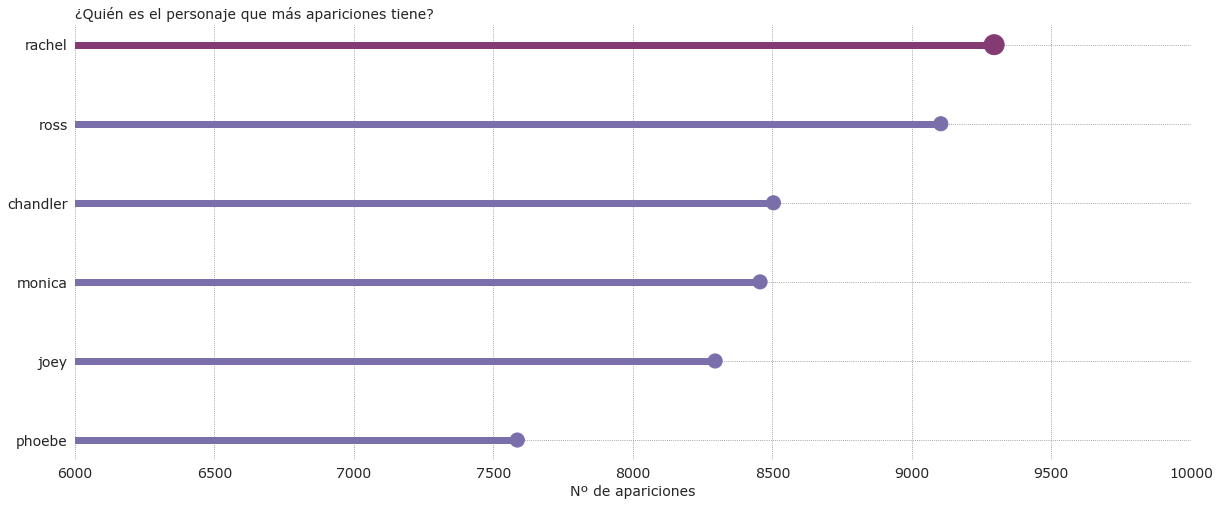

In [15]:
from tkinter import font

sns.set_style('white', {"axes.grid": True, 'grid.linestyle': ':', "grid.color": "grey", 'axes.spines.left': False,
 'axes.spines.bottom': False,
 'axes.spines.right': False,
 'axes.spines.top': False, 'font.family': ['Verdana']})

my_color=np.where(friends_vecesqhabla ['Unnamed: 0']==friends_vecesqhabla ['Unnamed: 0'].max(), v.rachel, v.colordefondo)
my_size=np.where(friends_vecesqhabla ['Unnamed: 0']==friends_vecesqhabla ['Unnamed: 0'].max(), 400, 200)

plt.figure(figsize=(20,8))
plt.hlines(y=friends_vecesqhabla.index,
           xmin=140,
           xmax=friends_vecesqhabla,
           color=my_color, linewidth=7)
plt.scatter(friends_vecesqhabla, friends_vecesqhabla.index, color=my_color, s=my_size, alpha=1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(6000,10000)
plt.title('¿Quién es el personaje que más apariciones tiene?', loc='left', fontsize=14)
plt.xlabel('Nº de apariciones', fontsize=14 )
# plt.ylabel('Personajes', fontsize=14)

plt.show()

In [16]:
# HACEMOS OTRO RECUENTO COMPARATIVO DEL NÚMERO DE PALABRAS QUE CADA PROTA DICE A LO LARGO DE LA SERIE

friends_cant_palabras = friends_1_filtr.groupby(['character']).sum()[['words_for_line']].sort_values(by='words_for_line', ascending=True)
friends_cant_palabras


,words_for_line
character,
phoebe,82150
monica,82989
chandler,87246
joey,87521
ross,94962
rachel,97525


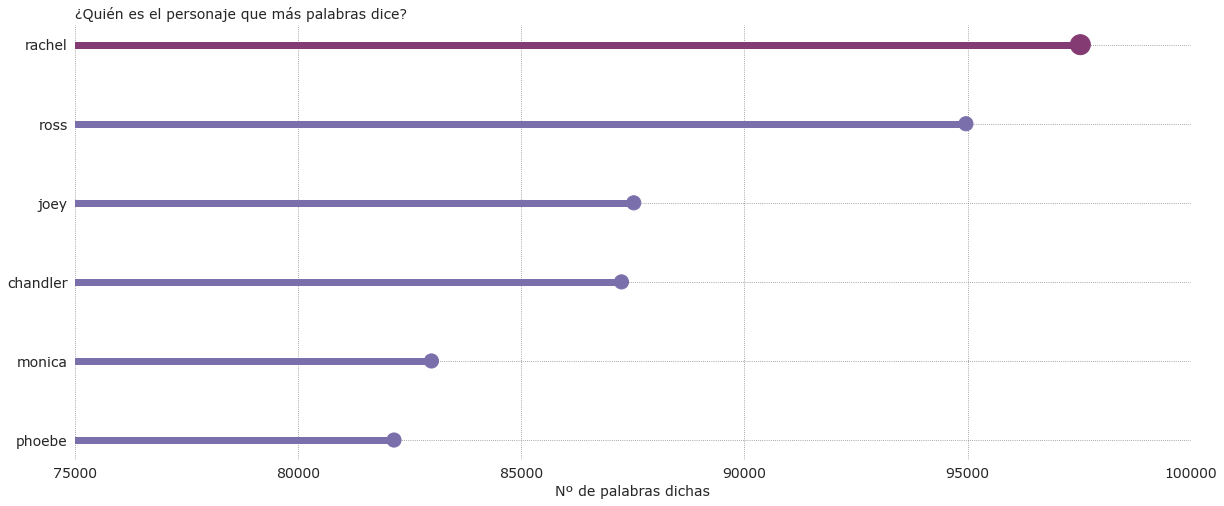

In [17]:
sns.set_style('white', {"axes.grid": True, 'grid.linestyle': ':', "grid.color": "grey", 'axes.spines.left': False,
 'axes.spines.bottom': False,
 'axes.spines.right': False,
 'axes.spines.top': False, 'font.family': ['Verdana']})

my_color=np.where(friends_cant_palabras ['words_for_line']==friends_cant_palabras ['words_for_line'].max(), v.rachel, v.colordefondo)
my_size=np.where(friends_cant_palabras ['words_for_line']==friends_cant_palabras ['words_for_line'].max(), 400, 200)

plt.figure(figsize=(20,8))
plt.hlines(y=friends_cant_palabras.index,
           xmin=140,
           xmax=friends_cant_palabras,
           color=my_color, linewidth=7)
plt.scatter(friends_cant_palabras, friends_cant_palabras.index, color=my_color, s=my_size, alpha=1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(75000,100000)
plt.title('¿Quién es el personaje que más palabras dice?', loc='left', fontsize=14)
plt.xlabel('Nº de palabras dichas', fontsize=14 )
# plt.ylabel('Personajes', fontsize=14)

plt.show()

In [18]:
# LA FRASE MÁS LARGA DICHA EN TODA LA SERIE!

friends_1_filtr['words_for_line'].max()

196

In [19]:
friends_1_filtr[friends_1_filtr['words_for_line']==196]

,Unnamed: 0,season_number,episode_number,episode_name,character,words_for_line
47869,47869,8,18,the one in massapequa,monica,196


In [20]:
friends_por_temp = friends_1_filtr.drop(['Unnamed: 0','episode_name', 'episode_number', 'words_for_line'], axis=1)
friends_por_temp

,season_number,character
0,1,monica
1,1,joey
2,1,chandler
3,1,phoebe
4,1,phoebe
...,...,...
61251,10,chandler
61252,10,rachel
61253,10,monica
61254,10,rachel


In [21]:
# CREAMOS UNA FUNCIÓN PARA OBTENER UN DATAFRAME NUEVO CON LOS DATOS POR CADA PERSONAJE. EN ESTE CASO, DE LAS APARICIONES POR TEMPORADA.

# ross
temp_ross_res = f.filtro_a_df(friends_por_temp, 'character', 'ross', 'season_number')

# rachel
temp_rachel_res = f.filtro_a_df(friends_por_temp, 'character', 'rachel', 'season_number')

# monica
temp_monica_res = f.filtro_a_df(friends_por_temp, 'character', 'monica', 'season_number')

# chandler
temp_chandler_res = f.filtro_a_df(friends_por_temp, 'character', 'chandler', 'season_number')

# joey
temp_joey_res = f.filtro_a_df(friends_por_temp, 'character', 'joey', 'season_number')

# phoebe
temp_phoebe_res = f.filtro_a_df(friends_por_temp, 'character', 'phoebe', 'season_number')

In [22]:
# OBTENEMOS UN GRÁFICO CON LAS APARICIONES DE CADA PERSONAJE POR TEMPORADA. CREAMOS UNA FUNCIÓN PARA OBTENER LOS TRACE DE CADA UNO.

trace_ross = f.grafico_goscatter(temp_ross_res, 'season_number', 'Ross', v.ross, 'character')
trace_rachel = f.grafico_goscatter(temp_rachel_res, 'season_number', 'Rachel', v.rachel, 'character')
trace_monica = f.grafico_goscatter(temp_monica_res, 'season_number', 'Monica', v.monica, 'character')
trace_chandler = f.grafico_goscatter(temp_chandler_res, 'season_number', 'Chandler', v.chandler, 'character')
trace_joey = f.grafico_goscatter(temp_joey_res, 'season_number', 'Joey', v.joey, 'character')
trace_phoebe = f.grafico_goscatter(temp_phoebe_res, 'season_number', 'Phoebe', v.phoebe, 'character')

data = [trace_ross, trace_rachel, trace_monica, trace_chandler, trace_joey, trace_phoebe]

layout = dict(title = 'Aparición de cada personaje por temporada',
             xaxis= dict(title= 'Temporadas', ticklen= 5, showgrid=True, gridwidth=0.1, gridcolor='lightgrey'), 
             yaxis= dict(title='Valoración en IMDB',showgrid=True, gridwidth=0.1, gridcolor='lightgrey'), plot_bgcolor='white'
           )

fig = go.Figure(data = data, layout=layout)

fig.write_html("evolucion_personaje_por_temporada.html")

iplot(fig)

In [23]:
# CONCATENAMOS LAS COLUMNAS DE LA TEMPORADA Y DE LOS EPISODIOS, PARA CONTABILIZAR LOS CAPITULOS Y EL PROTAGONISTA DE CADA UNO DE ELLOS

friends_1['temp_mas_cap'] = friends_1['season_number'].map(str) + '.' + friends_1['episode_number'].map(str)

capitulos = friends_1['temp_mas_cap'].unique()


In [24]:
# SACAMOS UN DATAFRAME FILTRADO POR CAPÍTULO Y PROTAGONISTAS DESDE EL DATASET PRINCIPAL

friends_temp_mas_cap = friends_1[['temp_mas_cap','character']]
friends_temp_mas_cap

,temp_mas_cap,character
0,1.1,monica
1,1.1,joey
2,1.1,chandler
3,1.1,phoebe
4,1.1,phoebe
...,...,...
61251,10.17,chandler
61252,10.17,rachel
61253,10.17,monica
61254,10.17,rachel


In [25]:
# SACAMOS UN DATAFRAME REDUCIDO CON EL PERSONAJE PROTAGONISTA POR CAPÍTULO

lista_prota_por_cap=[]

for i in capitulos:
    df=friends_temp_mas_cap[friends_temp_mas_cap['temp_mas_cap']==i].groupby(['character']).count().sort_values(by='temp_mas_cap', ascending=False)
    lista_prota_por_cap.append(df.index[0])
lista_prota_por_cap

friends_PROTA_por_cap = pd.DataFrame(list(zip(friends_temp_mas_cap['temp_mas_cap'].unique(), lista_prota_por_cap)), columns=['temp_mas_cap','prota_por_cap'])
friends_PROTA_por_cap.head()

,temp_mas_cap,prota_por_cap
0,1.1,monica
1,1.2,ross
2,1.3,monica
3,1.4,monica
4,1.5,ross


c:\Users\pieci\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



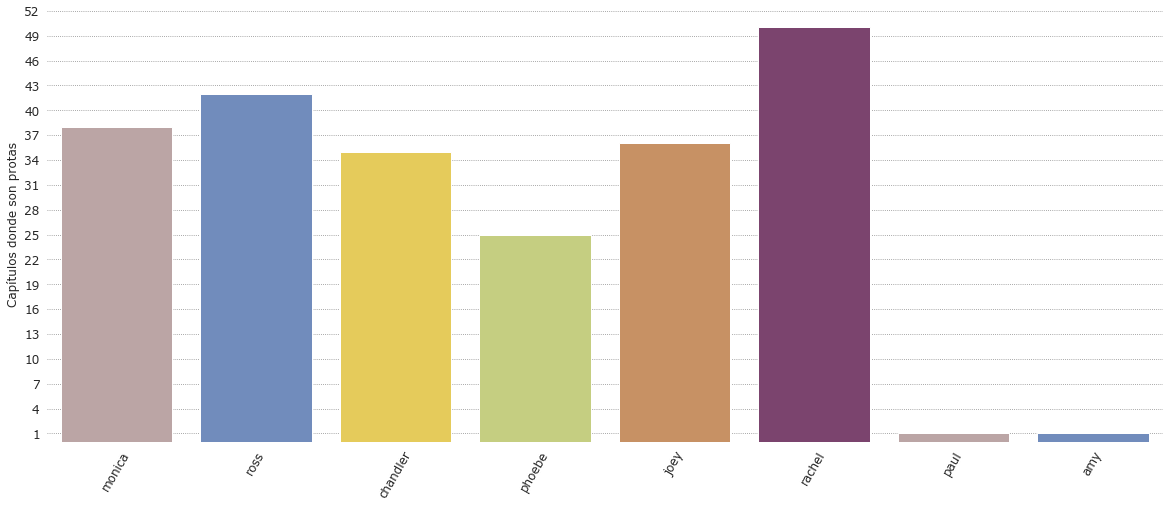

In [26]:
# SACAMOS UNA GRÁFICA CON LOS PERSONAJES QUE HAN SIDO PROTAGONISTAS Y EL RECUENTO DE CAPÍTULOS QUE HAN PROTAGONIZADO

plt.figure(figsize=(20,8))
ax = sns.countplot(friends_PROTA_por_cap['prota_por_cap'], palette=v.lista_de_colores);
# ax[0].set_color(v.monica)
# ax.invert_xaxis()
ax.set_yticks(np.arange(1,55,3))
plt.xticks(rotation=60,fontsize=12);
plt.yticks(fontsize=12);
plt.ylabel('Capítulos donde son protas', fontsize=12, rotation=90)
plt.xlabel(' ');

In [27]:
# EMPEZAMOS A TRABAJAR CON EL SEGUNDO DATASET, QUE CONTIENE LAS VALORACIONES EN IMDB POR CAPÍTULO

friends_imdb2.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,The One Where Monica Gets a Roommate,22 Sep. 1994,8.3,8378,"Monica and the gang introduce Rachel to the ""r..."
1,1,2,The One with the Sonogram at the End,29 Sep. 1994,8.0,6441,Ross finds out his ex-wife is pregnant. Rachel...
2,1,3,The One with the Thumb,6 Oct. 1994,8.1,6060,Monica becomes irritated when everyone likes h...
3,1,4,The One with George Stephanopoulos,13 Oct. 1994,8.1,5892,Joey and Chandler take Ross to a hockey game t...
4,1,5,The One with the East German Laundry Detergent,20 Oct. 1994,8.4,5872,"Eager to spend time with Rachel, Ross pretends..."


In [28]:
# UNIFICAMOS LAS COLUMNAS DE TEMPORADA Y CAPÍTULO PARA PODER RELACIONARLO CON EL DATASET DE LOS PERSONAJES

friends_imdb2['temp_mas_cap'] = friends_imdb2['season'].map(str) + '.' + friends_imdb2['episode_num'].map(str) 
friends_imdb2.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc,temp_mas_cap
0,1,1,The One Where Monica Gets a Roommate,22 Sep. 1994,8.3,8378,"Monica and the gang introduce Rachel to the ""r...",1.1
1,1,2,The One with the Sonogram at the End,29 Sep. 1994,8.0,6441,Ross finds out his ex-wife is pregnant. Rachel...,1.2
2,1,3,The One with the Thumb,6 Oct. 1994,8.1,6060,Monica becomes irritated when everyone likes h...,1.3
3,1,4,The One with George Stephanopoulos,13 Oct. 1994,8.1,5892,Joey and Chandler take Ross to a hockey game t...,1.4
4,1,5,The One with the East German Laundry Detergent,20 Oct. 1994,8.4,5872,"Eager to spend time with Rachel, Ross pretends...",1.5


In [29]:
# SACAMOS UN DATAFRAME CON LA VALORACIÓN POR CAPÍTULO

friends_IMDB_por_cap = friends_imdb2[['temp_mas_cap','imdb_rating']]
friends_IMDB_por_cap

,temp_mas_cap,imdb_rating
0,1.1,8.3
1,1.2,8.0
2,1.3,8.1
3,1.4,8.1
4,1.5,8.4
...,...,...
230,10.13,8.5
231,10.14,8.6
232,10.15,8.5
233,10.16,8.9


In [30]:
# UNIFICAMOS ESTE DATASET DE VALORACIONES POR CAPÍTULO CON NUESTRO DATASET DE PROTAGONISTA POR CAPÍTULO

friends_PROTA_por_cap
friends_IMDB_por_cap
pd.options.display.max_rows = 500
data_protas_valoracion = pd.merge(friends_PROTA_por_cap,friends_IMDB_por_cap, how='outer')
data_protas_valoracion.dropna(how='any', axis=0, inplace=True)
data_protas_valoracion.sort_values(by='imdb_rating', ascending=False, inplace=True)


# SACAMOS UN TOP 20 DE LOS CAPÍTULOS MÁS VALORADOS
top20_valorados = data_protas_valoracion.iloc[:21]
top20_valorados

,temp_mas_cap,prota_por_cap,imdb_rating
227,10.17,ross,9.7
108,5.14,phoebe,9.7
83,4.12,monica,9.5
37,2.14,monica,9.4
168,8.4,ross,9.3
173,8.9,monica,9.3
94,4.24,joey,9.2
126,6.9,ross,9.2
63,3.16,ross,9.1
103,5.9,rachel,9.1


In [31]:
import dataframe_image as dfi

data_protas_valoracion.describe()

dfi.export(data_protas_valoracion.describe(), 'imbd_estadísticas.png')

<Figure size 1440x1440 with 0 Axes>

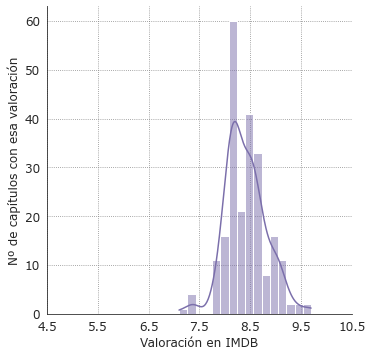

In [32]:
plt.figure(figsize=(20,20))
# sns.set(rc = {'figure.figsize':(100,6)})
sns.displot(data = data_protas_valoracion['imdb_rating'], kde = True, color=v.colordefondo)

plt.xticks(ticks=np.arange(4.5,11,1),fontsize=12);
plt.yticks(ticks=np.arange(0,65,10), fontsize=12);
plt.ylabel('Nº de capítulos con esa valoración', fontsize=12, rotation=90)
plt.xlabel('Valoración en IMDB', fontsize=12);

In [33]:
# ELIMINAMOS DE ESTE DATAFRAME LOS DOS PERSONAJES QUE NO CORRESPONDEN A LOS 6 PROTAS

mask_amy = data_protas_valoracion[data_protas_valoracion['prota_por_cap']=='amy'].index
mask_paul = data_protas_valoracion[data_protas_valoracion['prota_por_cap']=='paul'].index
data_protas_valoracion = data_protas_valoracion.drop(mask_amy|mask_paul)


c:\Users\pieci\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead



In [34]:
nota_media = data_protas_valoracion.groupby('prota_por_cap').mean().sort_values(by='imdb_rating', ascending=False)
nota_media

,imdb_rating
prota_por_cap,
ross,8.492857
phoebe,8.480000
monica,8.471053
chandler,8.362857
rachel,8.340000
joey,8.338889


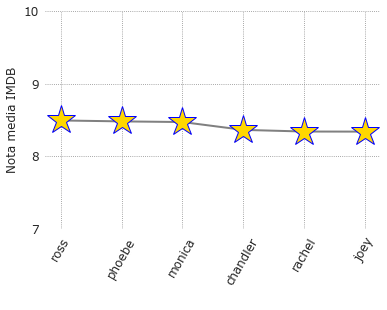

In [35]:
# , markerfmt='*', bottom=1.1, use_line_collection=True,  linefmt='grey'

x= nota_media.index
y= nota_media['imdb_rating']
plt.plot(x,y, '-*',
        color='grey',
        linewidth = 2,
        markersize = 30,
        markerfacecolor = 'gold',
        markeredgecolor = 'blue',
        markeredgewidth = 1)
plt.yticks(np.arange(7,11), fontsize=12)
plt.xticks(fontsize=12, rotation=60)
plt.xlabel(' ', fontsize=12)
plt.ylabel('Nota media IMDB', fontsize=12);
plt.show()


In [36]:
# EMPEZAMOS A TRABAJAR CON EL TERCER DATASET, QUE CONTIENE LAS VISUALI ZACIONES POR CAPÍTULO

friends_visualiz.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,1994-09-22,456650,21500000.0
1,1,2,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,456652,20200000.0
2,1,3,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,1994-10-06,456651,19500000.0
3,1,4,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,1994-10-13,456654,19700000.0
4,1,5,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,456653,18600000.0


In [37]:
friends_visualiz['temp_mas_cap'] = friends_visualiz['season'].map(str) + '.' + friends_visualiz['episode_num_in_season'].map(str) 
friends_visualiz.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers,temp_mas_cap
0,1,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,1994-09-22,456650,21500000.0,1.1
1,1,2,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,456652,20200000.0,1.2
2,1,3,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,1994-10-06,456651,19500000.0,1.3
3,1,4,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,1994-10-13,456654,19700000.0,1.4
4,1,5,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,456653,18600000.0,1.5


In [38]:
visual_por_temp = friends_visualiz[['season','us_viewers']]
visual_por_temp_agrup = round(visual_por_temp.groupby('season').mean(),-4)
visual_por_temp_agrup

,us_viewers
season,
1,24790000.0
2,31720000.0
3,26080000.0
4,24950000.0
5,24750000.0
6,23050000.0
7,22050000.0
8,26720000.0
9,23930000.0


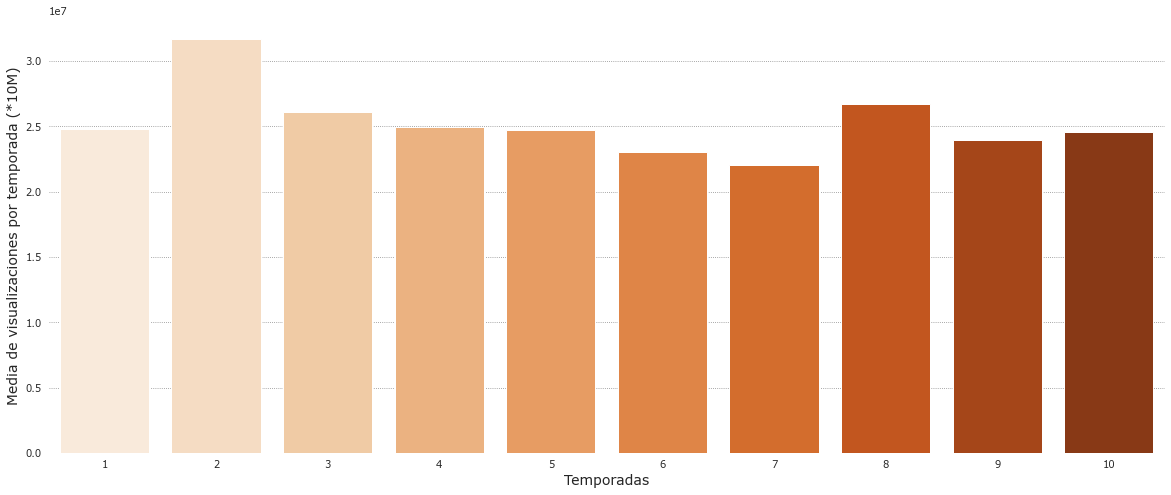

In [39]:
plt.figure(figsize=(20,8))
# sns.set(rc = {'figure.figsize':(100,6)})
sns.barplot(data = visual_por_temp_agrup, x=visual_por_temp_agrup.index, y=visual_por_temp_agrup['us_viewers'], palette='Oranges')

plt.ylabel('Media de visualizaciones por temporada (*10M)', fontsize=14, rotation=90)
plt.xlabel('Temporadas', fontsize=14);

In [40]:
friends_visualiz = friends_visualiz[['temp_mas_cap','us_viewers']]
friends_visualiz.head()

,temp_mas_cap,us_viewers
0,1.1,21500000.0
1,1.2,20200000.0
2,1.3,19500000.0
3,1.4,19700000.0
4,1.5,18600000.0


In [41]:
# UNIFICAMOS ESTE DATASET DE VISUALIZACIONES POR CAPÍTULO CON NUESTROS DATASETS ANTERIORES

data_protas_valoracion
friends_visualiz

pd.options.display.max_rows = 500
data_protas_val_visua = pd.merge(data_protas_valoracion,friends_visualiz, how='outer')
data_protas_val_visua.dropna(how='any', axis=0, inplace=True)
data_protas_val_visua.sort_values(by='us_viewers', ascending=True, inplace=True)
data_protas_val_visua.head()


,temp_mas_cap,prota_por_cap,imdb_rating,us_viewers
223,7.21,chandler,7.4,15650000.0
122,7.20,rachel,8.3,16300000.0
44,7.19,monica,8.7,16540000.0
164,7.8,chandler,8.2,16570000.0
124,7.22,rachel,8.3,17230000.0


In [42]:

# imdb_size  = data_protas_val_visua['imdb_rating']
# us_viewers_color = [float(each) for each in data_protas_val_visua['us_viewers']]

# data = [
#     {
#         'y': data_protas_val_visua['imdb_rating'],
#         'x': data_protas_val_visua['us_viewers'],
#         'mode': 'markers',
#         'marker': {
#             'color': imdb_size,
#             'size': imdb_size,
#             'showscale': True,
#             'colorscale':v.degradado_colores,       
              
            
#         },
#         'text': data_protas_val_visua['temp_mas_cap'],
        
#     }
# ]

# iplot(data)

In [47]:
# PINTAMOS UN ÚLTIMO GRÁFICO DE LA RELACIÓN ENTRE LAS VISUALIZACIONES Y LA VALORACIÓN EN IMDB

imdb_size  = data_protas_val_visua['imdb_rating']
us_viewers_color = [float(each) for each in data_protas_val_visua['us_viewers']]

data = [
    {
        'y': data_protas_val_visua['imdb_rating'],
        'x': data_protas_val_visua['us_viewers'],
        'mode': 'markers',
        'marker': {
            'color': imdb_size,
            'size': imdb_size,
            'showscale': True,
            'colorscale':v.degradado_colores,       
              
            
        },
        'text': data_protas_val_visua['temp_mas_cap'],
        
    }
]


layout = dict(title = 'Relación entre valoración en IMDB y visualizaciones',
             xaxis= dict(title= 'Millones de visualizaciones', showgrid=True, gridwidth=0.1, gridcolor='grey'), 
             yaxis= dict(title='Valoración en IMDB',showgrid=True, gridwidth=0.1, gridcolor='grey'),
             plot_bgcolor='white'
           )

fig = go.Figure(data = data, layout=layout)
fig.show()

fig.write_html("Relación entre valoración en IMDB y visualizaciones.html")
